In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/NYCTaxiFares.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df["fare_amount"].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df["dist_km"] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [14]:
my_time = df['pickup_datetime'][0]

In [15]:
my_time.hour

8

In [16]:
df["EDTdate"] = df["pickup_datetime"] - pd.Timedelta(hours=4)

In [17]:
df["Hour"] = df["EDTdate"].dt.hour

In [18]:
df["AMorPM"] = np.where(df["Hour"] < 12, 'am', 'pm')

In [19]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [26]:
df["Weekday"] = df["EDTdate"].dt.strftime("%a")

In [27]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [28]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [29]:
cat_cols = ["Hour", "AMorPM", "Weekday"]
cont_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']

In [30]:
y_col = ["fare_amount"]

In [31]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [32]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [34]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [35]:
df["Hour"].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [36]:
df["AMorPM"].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [37]:
df["Weekday"].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [42]:
df["Hour"].cat.codes

0          4
1         11
2          7
3         17
4         22
5          4
6         15
7          5
8          4
9         14
10        18
11        13
12         8
13        22
14         6
15        19
16        17
17         4
18        19
19        21
20         7
21         5
22         9
23        12
24        10
25         5
26        17
27        19
28        15
29        18
          ..
119970    11
119971    19
119972     3
119973    22
119974     2
119975    13
119976    16
119977     2
119978    16
119979     6
119980     1
119981     9
119982    13
119983    17
119984    13
119985    12
119986    19
119987     6
119988     8
119989    15
119990    10
119991    12
119992     4
119993     7
119994    17
119995    10
119996     6
119997    14
119998     4
119999    12
Length: 120000, dtype: int8

In [43]:
hr = df["Hour"].cat.codes.values
ampm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values

In [44]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [45]:
cats = np.stack([hr, ampm, wkdy], axis=1)
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [46]:
# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [47]:
cats = torch.tensor(cats, dtype=torch.int64)


In [48]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [49]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [50]:
conts = torch.tensor(conts, dtype=torch.float)
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [53]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [54]:
cats.shape

torch.Size([120000, 3])

In [55]:
conts.shape

torch.Size([120000, 6])

In [56]:
y.shape

torch.Size([120000, 1])

In [57]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [58]:
cat_szs

[24, 2, 7]

In [60]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [63]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [65]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [68]:
# Forward METHOD cats
embedingz = []

for i, e in enumerate(selfembeds):
    embedingz.append(e(catz[:,1]))
embedingz

[tensor([[ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
          -0.8641, -1.6509, -0.2824,  0.7609],
         [ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
          -0.8641, -1.6509, -0.2824,  0.7609],
         [ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
          -0.8641, -1.6509, -0.2824,  0.7609],
         [ 0.4497, -0.1151, -0.7761, -0.6620, -1.9080, -0.0785,  0.1125, -1.1495,
          -0.1770,  0.9120, -2.6649, -0.1873]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.1315],
         [ 0.1315],
         [ 0.1315],
         [-0.7541]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.5963, -1.8804,  0.5827, -0.6895],
         [-0.5963, -1.8804,  0.5827, -0.6895],
         [-0.5963, -1.8804,  0.5827, -0.6895],
         [-0.9366,  0.6275, -0.4078, -2.4705]], grad_fn=<EmbeddingBackward>)]

In [69]:
z = torch.cat(embedingz, 1)

In [70]:
z

tensor([[ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
         -0.8641, -1.6509, -0.2824,  0.7609,  0.1315, -0.5963, -1.8804,  0.5827,
         -0.6895],
        [ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
         -0.8641, -1.6509, -0.2824,  0.7609,  0.1315, -0.5963, -1.8804,  0.5827,
         -0.6895],
        [ 0.8386,  0.4783,  0.6467,  0.1680,  1.4796, -0.4538, -1.1980,  0.3495,
         -0.8641, -1.6509, -0.2824,  0.7609,  0.1315, -0.5963, -1.8804,  0.5827,
         -0.6895],
        [ 0.4497, -0.1151, -0.7761, -0.6620, -1.9080, -0.0785,  0.1125, -1.1495,
         -0.1770,  0.9120, -2.6649, -0.1873, -0.7541, -0.9366,  0.6275, -0.4078,
         -2.4705]], grad_fn=<CatBackward>)

In [71]:
selfembdrop = nn.Dropout(0.4)

In [72]:
z = selfembdrop(z)
z

tensor([[ 1.3976,  0.0000,  0.0000,  0.0000,  2.4661, -0.7563, -0.0000,  0.5825,
         -1.4401, -0.0000, -0.4706,  1.2681,  0.2191, -0.0000, -3.1340,  0.0000,
         -1.1492],
        [ 0.0000,  0.7971,  0.0000,  0.2800,  0.0000, -0.0000, -1.9966,  0.5825,
         -1.4401, -2.7516, -0.4706,  1.2681,  0.0000, -0.9939, -0.0000,  0.9711,
         -0.0000],
        [ 1.3976,  0.7971,  1.0778,  0.0000,  0.0000, -0.7563, -0.0000,  0.5825,
         -1.4401, -0.0000, -0.4706,  1.2681,  0.0000, -0.9939, -3.1340,  0.9711,
         -0.0000],
        [ 0.7495, -0.1919, -1.2935, -1.1033, -0.0000, -0.0000,  0.0000, -0.0000,
         -0.2950,  0.0000, -4.4415, -0.0000, -1.2568, -0.0000,  0.0000, -0.6796,
         -4.1175]], grad_fn=<MulBackward0>)

In [83]:
class TabularModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        
        # Layers = [200, 100, 50]
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, 1]))
        
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        
        return x

In [84]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [85]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [86]:
batch_size = 60000
test_size = int(batch_size * 0.2)

In [87]:
# Data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [88]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [90]:
len(cat_train), len(con_train), len(cat_test), len(con_test)

(48000, 48000, 12000, 12000)

In [93]:
import time

start_time = time.time()

epochs = 300

losses = []
for i in range(epochs):
    i+=1
    
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) #RMSE
    losses.append(loss)
    
    if i%25 == 1:
        print(f"epoch: {i} loss is {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f"Training took {duration/60} minutes")

epoch: 1 loss is 10.430469512939453
epoch: 26 loss is 9.53349781036377
epoch: 51 loss is 8.735991477966309
epoch: 76 loss is 7.8647894859313965
epoch: 101 loss is 6.800710678100586
epoch: 126 loss is 5.615985870361328
epoch: 151 loss is 4.469368934631348
epoch: 176 loss is 3.7379560470581055
epoch: 201 loss is 3.5058162212371826
epoch: 226 loss is 3.4170010089874268
epoch: 251 loss is 3.3903820514678955
epoch: 276 loss is 3.4041337966918945
Training took 9.406135241190592 minutes


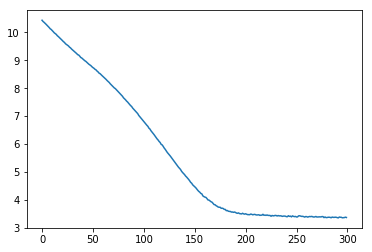

In [95]:
plt.plot(range(epochs), losses)

In [96]:
with torch.no_grad():
    
    y_val = model(cat_test, con_test)
    
    loss = torch.sqrt(criterion(y_val, y_test))

In [97]:
loss

tensor(3.3335)

In [101]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f"{1}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}")

1.) PREDICTED:     4.66 TRUE:     2.90 DIFF:     1.76
1.) PREDICTED:    23.26 TRUE:     5.70 DIFF:    17.56
1.) PREDICTED:     8.14 TRUE:     7.70 DIFF:     0.44
1.) PREDICTED:    14.90 TRUE:    12.50 DIFF:     2.40
1.) PREDICTED:     1.29 TRUE:     4.10 DIFF:     2.81
1.) PREDICTED:     5.83 TRUE:     5.30 DIFF:     0.53
1.) PREDICTED:     3.82 TRUE:     3.70 DIFF:     0.12
1.) PREDICTED:    19.05 TRUE:    14.50 DIFF:     4.55
1.) PREDICTED:     4.97 TRUE:     5.70 DIFF:     0.73
1.) PREDICTED:    12.26 TRUE:    10.10 DIFF:     2.16


In [102]:
torch.save(model.state_dict(), "TaxiModelSaul.pt")